# Spam Ham Classification

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['label', 'message'])

In [4]:
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))

df['message'] = df['message'].apply(lambda x: ' '.join(term for term in nltk.word_tokenize(x.lower()) if term not in stop_words and term.isalpha()))

Vectorize

In [7]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df['message'])
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [10]:
predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))


Accuracy:  0.9688809096349491
Confusion Matrix: 
 [[1429   34]
 [  18  190]]


# Movie Recommendation System

Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences from many users (collaborating).

In [ ]:
#pip install scikit-surprise

In [11]:
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate


In [12]:
data = Dataset.load_builtin('ml-100k')

In [13]:
model = SVD()
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9383  0.9372  0.9336  0.9368  0.9312  0.9354  0.0026  
MAE (testset)     0.7409  0.7370  0.7351  0.7395  0.7348  0.7374  0.0024  
Fit time          2.44    2.29    1.57    3.86    2.77    2.58    0.75    
Test time         0.47    0.20    0.86    0.81    0.30    0.53    0.27    


{'test_rmse': array([0.93829319, 0.93717321, 0.93363181, 0.93682503, 0.93124509]),
 'test_mae': array([0.74085815, 0.73696025, 0.73510664, 0.73948771, 0.73476702]),
 'fit_time': (2.4361236095428467,
  2.2905120849609375,
  1.5699539184570312,
  3.861929416656494,
  2.7654991149902344),
 'test_time': (0.46594691276550293,
  0.2007923126220703,
  0.8585145473480225,
  0.8088805675506592,
  0.2962021827697754)}

In [14]:
trainset = data.build_full_trainset()
model.fit(trainset)

In [15]:
testset = trainset.build_anti_testset()
predictions = model.test(testset)

In [16]:
from collections import defaultdict

In [21]:
def get_top_n(predictions, n):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=3)

In [22]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

196 ['50', '408', '480']
186 ['318', '513', '174']
22 ['100', '12', '114']
244 ['127', '285', '190']
166 ['174', '98', '64']
298 ['64', '169', '173']
115 ['134', '474', '180']
253 ['515', '651', '272']
305 ['603', '488', '114']
6 ['603', '923', '657']
62 ['169', '408', '124']
286 ['515', '921', '12']
200 ['114', '64', '12']
210 ['169', '313', '318']
224 ['144', '64', '174']
303 ['169', '511', '178']
122 ['134', '192', '199']
194 ['513', '170', '42']
291 ['313', '272', '318']
234 ['408', '512', '169']
119 ['178', '318', '603']
167 ['98', '191', '483']
299 ['269', '223', '180']
308 ['114', '474', '302']
95 ['318', '603', '427']
38 ['302', '143', '174']
102 ['408', '430', '603']
63 ['127', '124', '12']
160 ['12', '48', '513']
50 ['483', '178', '520']
301 ['169', '178', '513']
225 ['408', '169', '168']
290 ['313', '251', '272']
97 ['12', '114', '480']
157 ['483', '478', '56']
181 ['313', '210', '272']
278 ['511', '169', '408']
276 ['178', '199', '657']
7 ['302', '272', '48']
10 ['169', '40

481 ['408', '114', '12']
492 ['114', '169', '12']
493 ['199', '64', '114']
490 ['195', '178', '169']
489 ['174', '408', '50']
483 ['174', '169', '114']
496 ['408', '238', '515']
494 ['12', '318', '172']
495 ['515', '199', '528']
477 ['302', '474', '265']
497 ['318', '483', '64']
488 ['169', '513', '114']
498 ['408', '285', '654']
499 ['169', '269', '515']
491 ['169', '659', '318']
500 ['127', '169', '12']
502 ['408', '169', '515']
503 ['474', '64', '1449']
504 ['513', '64', '190']
505 ['318', '143', '169']
506 ['22', '114', '144']
443 ['114', '169', '174']
507 ['242', '474', '265']
514 ['496', '603', '479']
508 ['169', '408', '134']
511 ['515', '318', '64']
515 ['12', '174', '408']
512 ['408', '114', '480']
513 ['174', '96', '272']
475 ['169', '513', '178']
523 ['302', '427', '496']
518 ['603', '483', '427']
509 ['114', '12', '169']
516 ['603', '408', '480']
510 ['408', '318', '513']
524 ['408', '272', '114']
501 ['169', '408', '12']
525 ['174', '64', '50']
521 ['64', '180', '169']
520

836 ['427', '100', '191']
816 ['174', '483', '318']
838 ['483', '603', '178']
839 ['272', '408', '173']
840 ['709', '408', '488']
832 ['169', '64', '318']
810 ['302', '474', '265']
844 ['357', '520', '98']
843 ['408', '169', '114']
834 ['408', '98', '172']
846 ['169', '408', '313']
837 ['89', '515', '483']
813 ['64', '408', '134']
842 ['12', '178', '98']
847 ['64', '313', '483']
848 ['302', '98', '408']
822 ['483', '134', '12']
852 ['318', '603', '313']
851 ['187', '114', '603']
849 ['302', '265', '144']
854 ['474', '169', '48']
850 ['169', '313', '265']
858 ['408', '169', '603']
853 ['134', '313', '169']
855 ['318', '172', '313']
824 ['169', '187', '313']
845 ['318', '357', '408']
841 ['318', '64', '178']
859 ['318', '169', '180']
862 ['408', '169', '604']
856 ['50', '408', '12']
820 ['174', '178', '272']
863 ['50', '408', '174']
860 ['12', '408', '251']
857 ['483', '408', '173']
864 ['272', '313', '89']
865 ['56', '127', '134']
868 ['134', '511', '171']
867 ['408', '178', '169']
861 

# Project -2 Spam/Ham Classification Detailed Project

NLP is a field concerned with the ability of a computer to understand, analyse, manipulate and potentially generate human language.

NLP is a broad umbrella that encompasses many topics. Some of them are sentiment analysis, topic modelling, text classification etc

NLTK- Natural Language Toolkit- The NLTK is the most utilised package for handling natural language processing tasks. It is an open source library.

In [23]:
import nltk
import pandas as pd
import numpy as np

In [24]:
dataset= pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [25]:
dataset['body_text'][0]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [26]:
dataset['body_text'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

What is the shape of the data

In [27]:
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5568 rows and 2 columns


How many Spam/Ham are there

In [28]:
print("Out of {} rows, {} are spam. {} are ham".format(len(dataset),len(dataset[dataset['label']=='spam']),
                                                      len(dataset[dataset['label']=='ham'])))

Out of 5568 rows, 746 are spam. 4822 are ham


How much missing data is present

In [29]:
print("Number of null in label: {}".format(dataset['label'].isnull().sum()))

print("Number of null in text: {}".format(dataset['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


Preprocessing text data- Cleaning up the text data is necessary to highlight attributes that you are going to use in ML algorithms.

Cleaning or preprocessing the data consists of a number of steps

Remove Punctuation

Tokenization

Remove Stopwords

Lemmatize/Stemming

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dataset['body_text_clean']=dataset['body_text'].apply(lambda x:remove_punct(x))

dataset.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


Tokenization- Tokenizing is splitting some string or sentence into a list of words

In [32]:
import re

def tokenize(text):
    tokens=re.split('\W',text)
    return tokens

dataset['body_text_tokenized']=dataset['body_text_clean'].apply(lambda x:tokenize(x.lower()))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


Remove Stopwords- These are comonly used words like the, and, but, if that don't contribut much to the meaning of a sentence.

In [33]:
stopwords= nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text

dataset['body_text_nostop']=dataset['body_text_tokenized'].apply(lambda x:remove_stopwords(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


Stemming- Stemming is the process of reducing inflected or derived owrds to their stem or root.

In [34]:
ps=nltk.PorterStemmer()

def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stemmed']=dataset['body_text_nostop'].apply(lambda x:stemming(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


Lemmatization- It is the process of grouping together the inflected forms of a word so they can be analysed as a single term, identified by the word's lemma.

For e.g. type, typing anf tyed are forms of the same lemma type.

In [35]:
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text=[wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text_lemmatized']=dataset['body_text_nostop'].apply(lambda x:lemmatizing(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


Vectorization- This is defined as the process of encoding text as integers to create feature vectors. In out ontext we will be taking inividual text messages and converting it to a numeric vector that represents that text message.

Count Vectorization- This creates a document-term matrix where the entry of each cell will be a count of the number of times that word occured in that document.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

count_vect= CountVectorizer(analyzer=clean_text)

X_count=count_vect.fit_transform(dataset['body_text'])

print(X_count.shape)

(5568, 8107)


Apply count vectorizer to a smaller sample

In [37]:
data_sample=dataset[0:20]

count_vect_sample= CountVectorizer(analyzer=clean_text)
X_count_sample= count_vect_sample.fit_transform(data_sample['body_text'])

print(X_count_sample.shape)

(20, 202)


Sparse Matrix- A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the lcoations of the non-zero elements.

In [38]:
X_count_sample

<20x202 sparse matrix of type '<class 'numpy.int64'>'
	with 231 stored elements in Compressed Sparse Row format>

In [39]:
x_counts_df= pd.DataFrame(X_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import warnings
warnings.filterwarnings("ignore")

x_counts_df.columns= count_vect_sample.get_feature_names()
x_counts_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


TF-IDF (Term Frequency, Inverse DOcument Frequency)- Creates a document term amtrix where the column represents single unique terms(unirams) but the cell represents a weighting meant to represent how important a word is to a document.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf= tfidf_vect.fit_transform(dataset['body_text'])

print(X_tfidf.shape)

(5568, 8107)


Apply TfidfVectorizer to a smaller sample

In [42]:
data_sample=dataset[0:20]

tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)

(20, 202)


In [43]:
x_tfidf_df= pd.DataFrame(X_tfidf_sample.toarray())
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()
x_tfidf_df

,,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.180710,0.000000,0.000000,0.227832,0.000000,0.000000,0.000000,0.000000,0.227832,0.000000,...,0.227832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature Engineering: Feature Creation

In [44]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


Create feature for text message length

In [45]:
dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))

dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


create feature for % of text that is punctuation

In [46]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


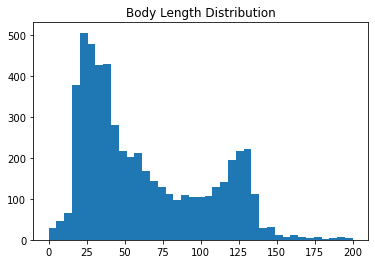

In [47]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.linspace(0,200,40)

plt.hist(dataset['body_len'],bins)
plt.title('Body Length Distribution')
plt.show()

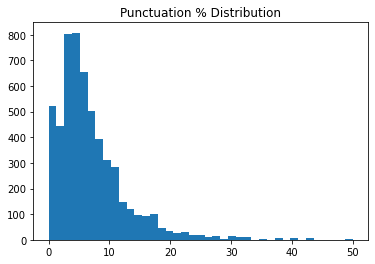

In [48]:
bins=np.linspace(0,50,40)

plt.hist(dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()


# Building Machine Learning Classifiers using Random Forest Model

In [49]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [50]:
dataset=pd.read_csv("SMSSpamCollection.tsv",sep="\t",header=None)

dataset.columns=['label','body_text']

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [51]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

dataset['body_len']=dataset["body_text"].apply(lambda x:len(x)-x.count(" "))
dataset['punct%']=dataset['body_text'].apply(lambda x:count_punct(x))

dataset.head()


,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [52]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf=tfidf_vect.fit_transform(dataset['body_text'])

In [53]:
X_features=pd.concat([dataset['body_len'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model using K-Fold cross validation

In [54]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)

cross_val_score(rf, X_features, dataset['label'],cv=k_fold, scoring='accuracy',n_jobs=1)

array([0.97576302, 0.97845601, 0.97576302, 0.96495957, 0.97214735])

# Model using Train Test Split

In [55]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X_features, dataset['label'],test_size=0.3,random_state=0)

In [57]:
rf=RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=-1)
rf_model=rf.fit(X_train, y_train)

In [58]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.05182588449648992, 'body_len'),
 (0.04096196522685902, 7353),
 (0.03846348851617279, 1804),
 (0.02982720411238607, 4799),
 (0.025874507816166046, 3135),
 (0.023979236514162672, 5727),
 (0.021801797756449092, 2032),
 (0.019080965919972034, 6288),
 (0.015999251298625804, 7030),
 (0.015802801396429356, 6749)]

In [59]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support=score(y_test, y_pred, pos_label='spam',average='binary')

In [60]:
print('Precision {} / Recall {} / Accuracy {}'.format(round(precision,3),
                                                     round(recall,3),
                                                     round((y_pred==y_test).sum()/len(y_pred),3)))

Precision 1.0 / Recall 0.593 / Accuracy 0.941
